## Section 1: Importing Librairies and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv', encoding='utf-8', skiprows=1, header=None)

heart.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG Results', 'Maximum Heart Rate Achieved', 'Exercise-Induced Angina', 'Previous Peak', 'Slope of Peak Exercise', 'Number of Major Vessels Coloured', 'Thalassemia Results', 'Output']

heart.head(303)

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,Previous Peak,Slope of Peak Exercise,Number of Major Vessels Coloured,Thalassemia Results,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Section 2: Calculating Metrics about Dataset

In [4]:
heart.describe()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,Previous Peak,Slope of Peak Exercise,Number of Major Vessels Coloured,Thalassemia Results,Output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Section 3: Separating Inputs and Output of Dataset

In [5]:
# Separating inputs and outputs
#x = heart.drop(['Output'],axis=1) # setting to axis 1 means the output column is removed
attributes = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG Results', 'Maximum Heart Rate Achieved', 'Exercise-Induced Angina', 'Previous Peak', 'Slope of Peak Exercise', 'Number of Major Vessels Coloured', 'Thalassemia Results']
x = heart[attributes]
y = heart['Output']

## Section 4: Completing Train, Test Split and Standardization

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Section 5: Building SVM Model

In [7]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predicted_output = dt.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_output) * 100
print("Accuracy:",accuracy,"%")

Accuracy: 81.9672131147541 %


In [8]:
metrics_report = metrics.classification_report(y_test, predicted_output)
print(metrics_report)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Section 6: Evaluating Forecasting Accuracy

In [9]:
cmatrix = confusion_matrix(y_test,predicted_output)
print(cmatrix)

[[25  4]
 [ 7 25]]


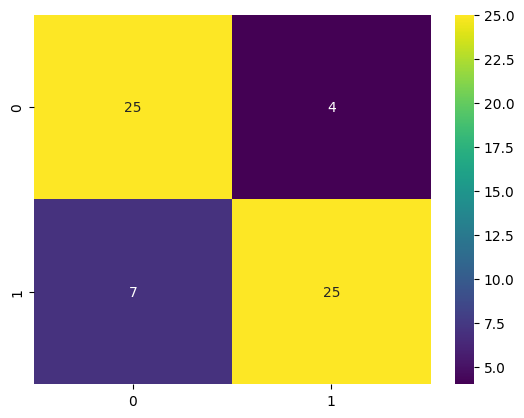

In [10]:
sns.heatmap(confusion_matrix(y_test,predicted_output),cmap='viridis',annot=True);

In [11]:
tp = 26
tn = 25
total_observation = 61
acc = (tp + tn) / total_observation
print("Accuracy:",acc*100,"%")

Accuracy: 83.60655737704919 %


AUC value is: 0.8216594827586207


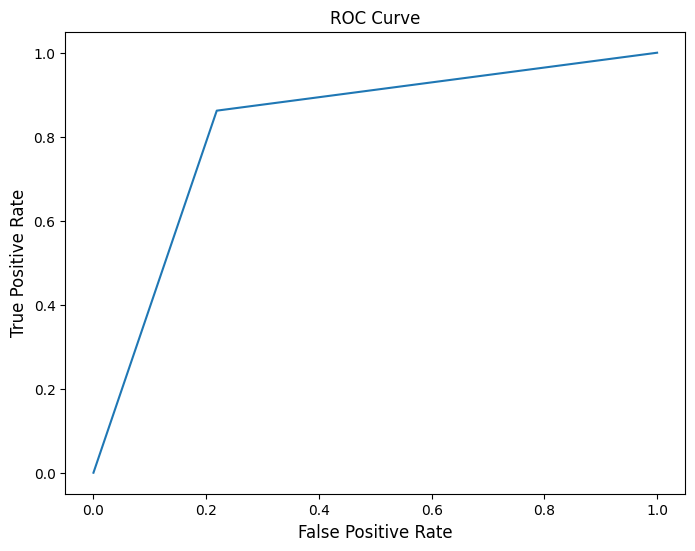

In [12]:
false_positive_rate, true_positive_rate, threshold = roc_curve(predicted_output, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Section 7: Printing Decision Tree

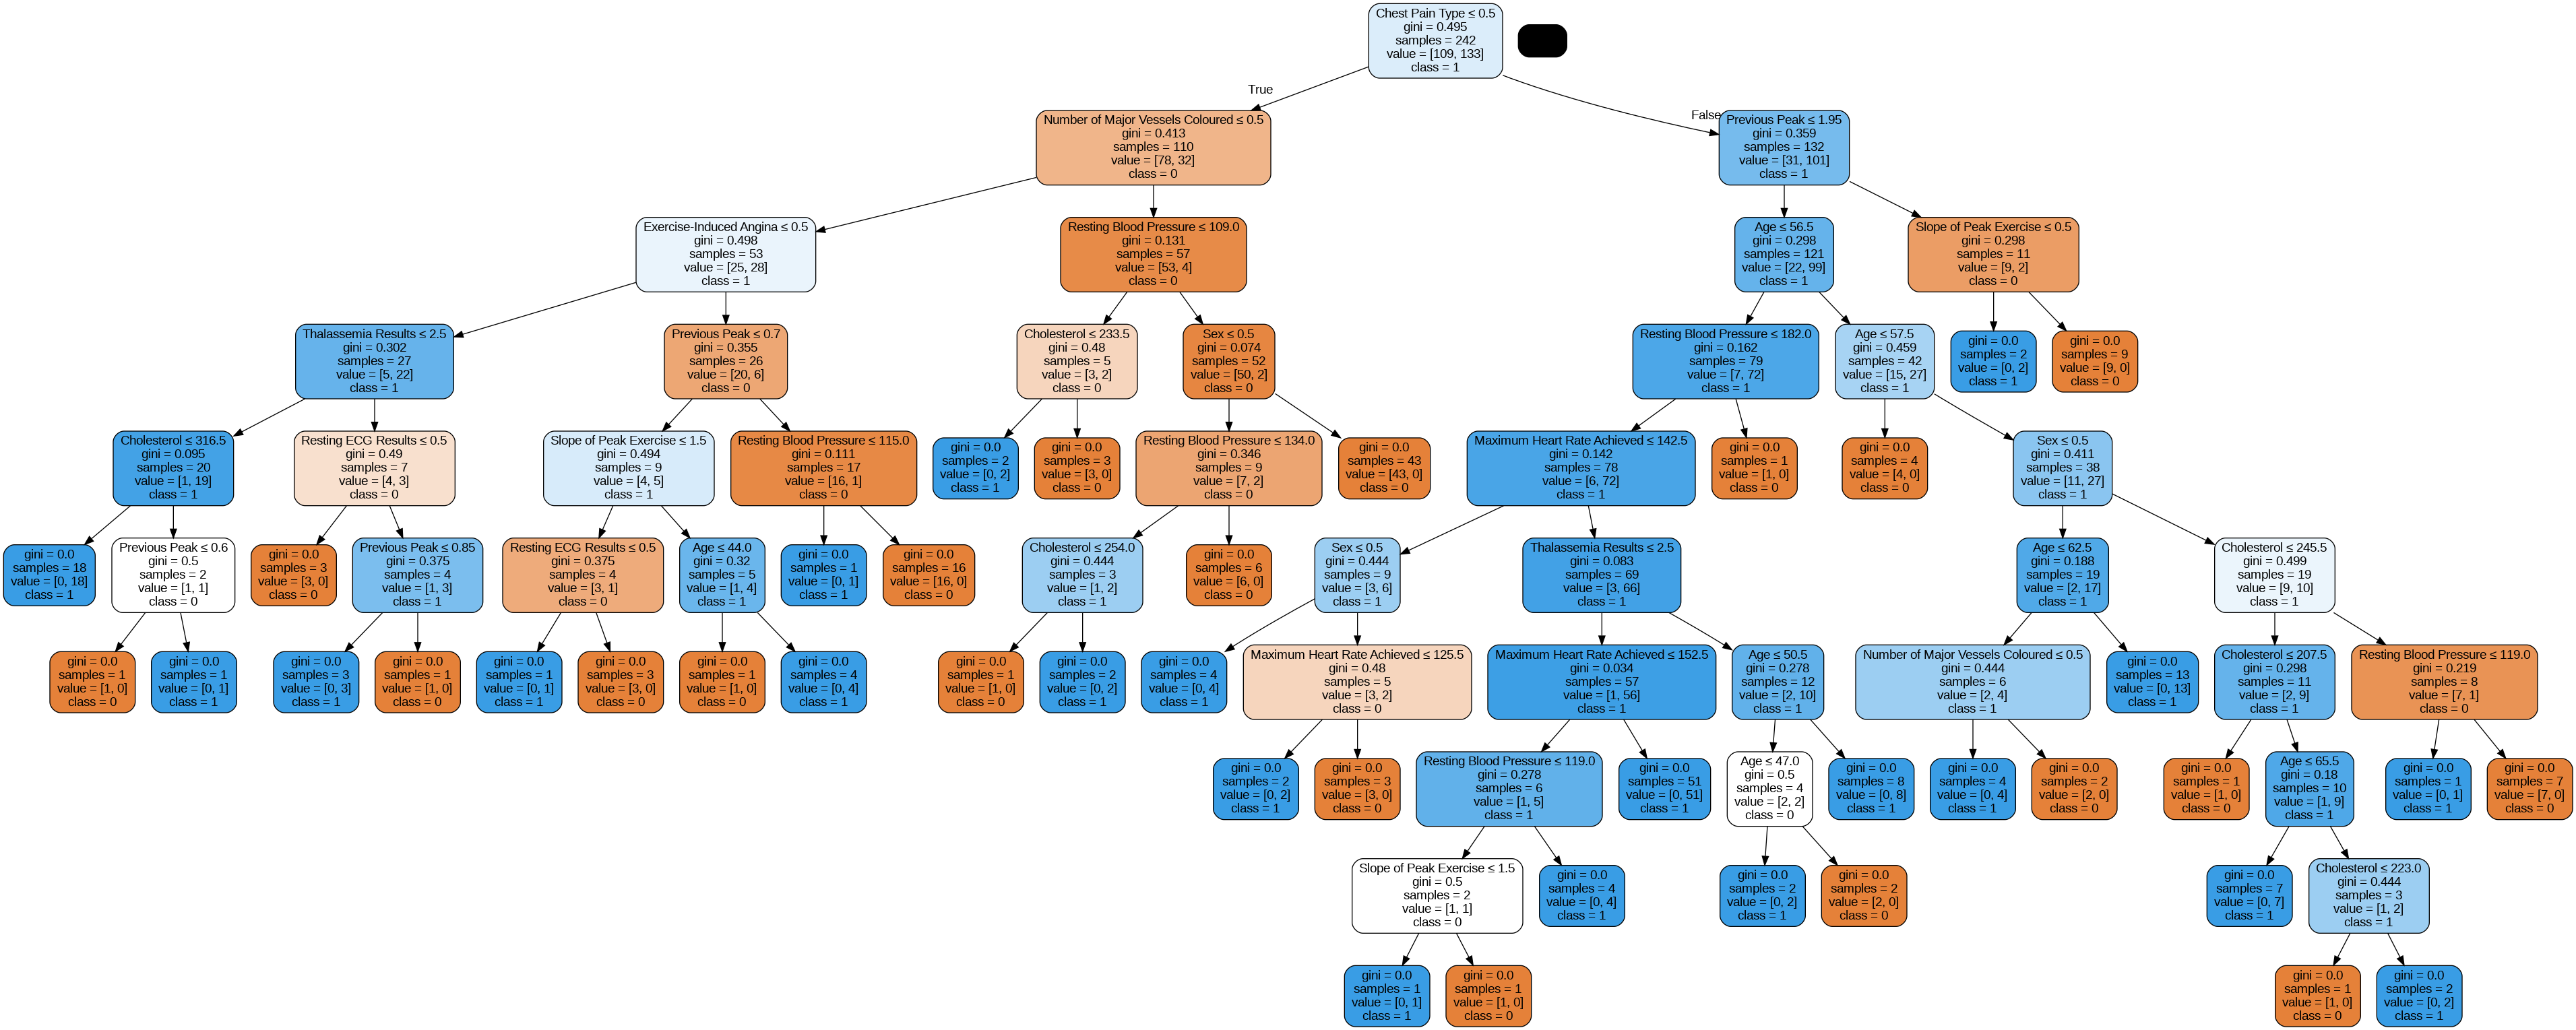

In [13]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = attributes,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart attack.png')
Image(graph.create_png())